### Import Modules

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


#print(os.listdir("../input"))

### Load and Preprocess Data

In [16]:
dataset=pd.read_csv('../input/Mall_Customers.csv')
pd.set_option('display.max_columns', 10)
print(dataset.keys())
print(len(dataset))
print(dataset.head())

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
200
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Descriptive statistics

In [17]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [3]:
print(dataset['Gender'].unique())
dataset['Gender_code'] = np.where(dataset['Gender']=='Male', 1,0)

['Male' 'Female']


Scale data

In [4]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(dataset[["Age","Annual Income (k$)","Spending Score (1-100)"]]))
df.columns = ["age","income","spending"]
df.insert(0, "gender", dataset["Gender_code"])
df.head()

,gender,age,income,spending
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


Closer look at the data

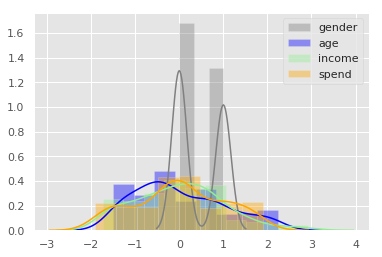

In [5]:
# Histograms
plot_gender = sns.distplot(df["gender"], label="gender",color="grey")
plot_age = sns.distplot(df["age"], label="age",color="blue")
plot_income = sns.distplot(df["income"], label="income",color="lightgreen")
plot_spend = sns.distplot(df["spending"], label="spend",color="orange")
plt.xlabel('')
plt.legend()
plt.show()

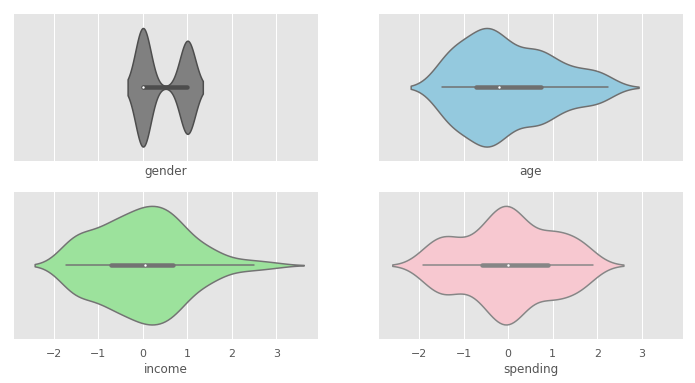

In [6]:
# Violin plot
f, axes = plt.subplots(2,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=df, x="gender", color="gray",ax=axes[0,0])
v2 = sns.violinplot(data=df, x="age", color="skyblue",ax=axes[0,1])
v3 = sns.violinplot(data=df, x="income",color="lightgreen", ax=axes[1,0])
v4 = sns.violinplot(data=df, x="spending",color="pink", ax=axes[1,1])

Age (more younger people) and gender (more females) are skewed.  
Income and spending are relatively unskewed.

### K-means
**Elbow Method for Finding K for K-Means**

[1, 4, 9, 16, 25, 36, 49]


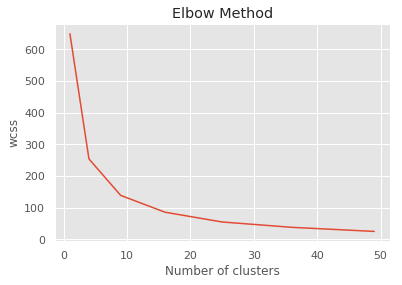

In [7]:
wcss = []
k_s = [i*i for i in range(1,8)]
print(k_s)
for i in k_s:
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(k_s,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

[4, 7, 9]


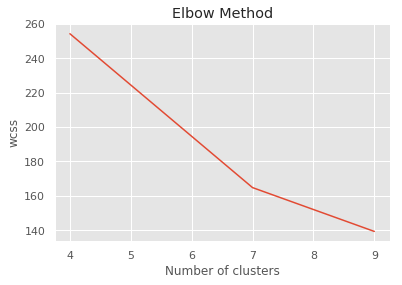

In [8]:
wcss = []
k_s = [4,7,9]
print(k_s)
for i in k_s:
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(k_s,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

[4, 6, 7]


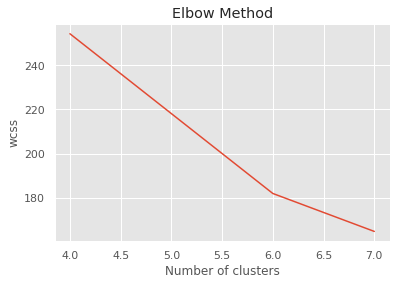

In [9]:
wcss = []
k_s = [4,6,7]
print(k_s)
for i in k_s:
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(k_s,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

[4, 5, 6]


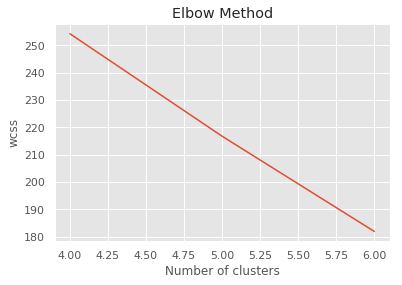

In [10]:
wcss = []
k_s = [4,5,6]
print(k_s)
for i in k_s:
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(k_s,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

The optimal number of clusters is 4 or 5.

**Applying K-Means**  
While optimal K is 4 or 5, we begin with K=2 and move upwards to identify groups better. 

Silhouette Score = 0.30


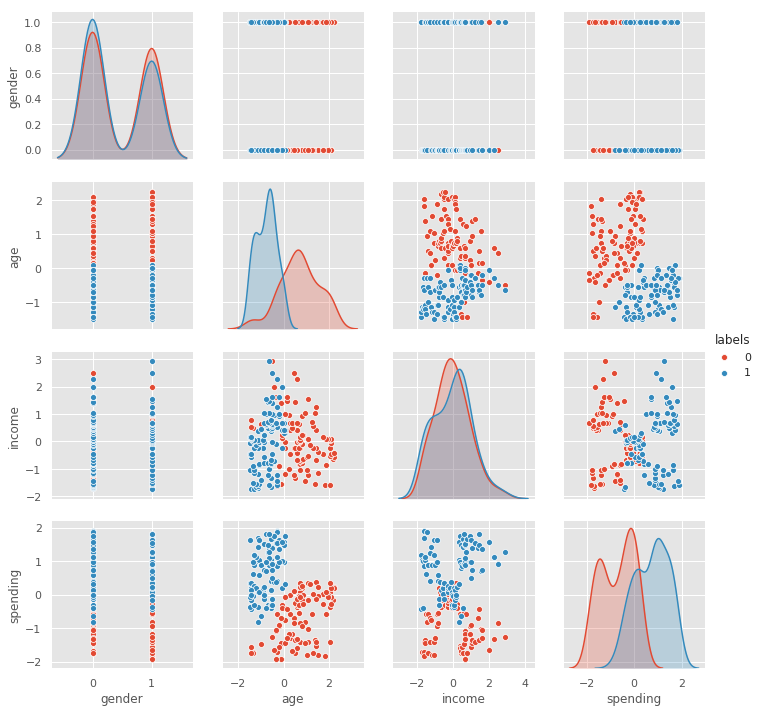

In [40]:
km2 = KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = km2.fit_predict(df[["gender","age","income","spending"]])
df2 = df
df2["labels"] = labels
sns.pairplot(df2,hue="labels",vars=["gender","age","income","spending"])
ss = silhouette_score(df2[["gender","age","income","spending"]], df2["labels"], metric="euclidean")
print(f"Silhouette Score = {ss:.3f}")

Younger people spend more.  
3 income groups exist in younger people. The lower income and upper income group spends more.  
The mid-income group spends less.

Older people spend less.  
3 income groups exist in older people. The lower income and upper income group spends less.
The mid-income group spends more (and similar to the spending of the younger mid-income group)

Younger people earn less than older people but there is some overlap in earning.

The plots suggest 3 - 5 natural clusters

Gender plots are not very clear in drawing conclusions. I am dropping those and will assess them at the end.

Silhouette Score = 0.358


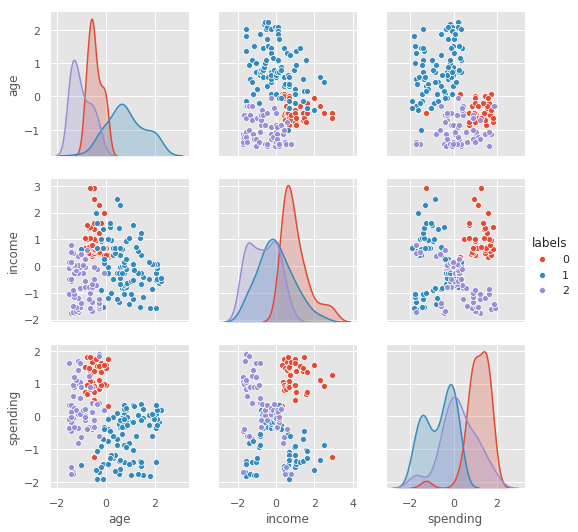

In [42]:
km3 = KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = km3.fit_predict(df[["age","income","spending"]])
df3 = df
df3["labels"] = labels
sns.pairplot(df3,hue="labels",vars=["age","income","spending"])
ss = silhouette_score(df3[["age","income","spending"]], df3["labels"], metric="euclidean")
print(f"Silhouette Score = {ss:.3f}")

For K=3, the conclusions drawn from K=2 plots are reiterated.
Furthermore, we find that a mid-age group has exceptionally high income and spending.

Silhouette Score = 0.404


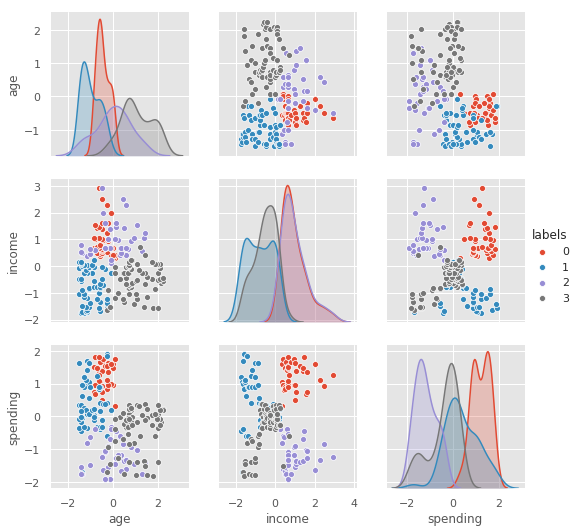

In [43]:
km4 = KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = km4.fit_predict(df[["age","income","spending"]])
df4 = df
df4["labels"] = labels
sns.pairplot(df4,hue="labels",vars=["age","income","spending"])
ss = silhouette_score(df4[["age","income","spending"]], df4["labels"], metric="euclidean")
print(f"Silhouette Score = {ss:.3f}")

Again as identified by K=2, one of the highest income groups also includes a faction of older people. However, they have very low spending.

Silhouette Score = 0.417


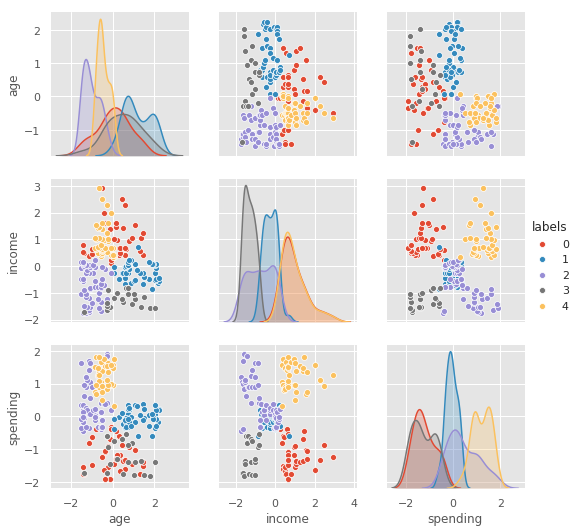

In [44]:
km5 = KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = km5.fit_predict(df[["age","income","spending"]])
df5 = df
df5["labels"] = labels
sns.pairplot(df5,hue="labels",vars=["age","income","spending"])
ss = silhouette_score(df5[["age","income","spending"]], df5["labels"], metric="euclidean")
print(f"Silhouette Score = {ss:.3f}")


K=5 further clarifies an evident cluster of old people with mid income and mid spending.

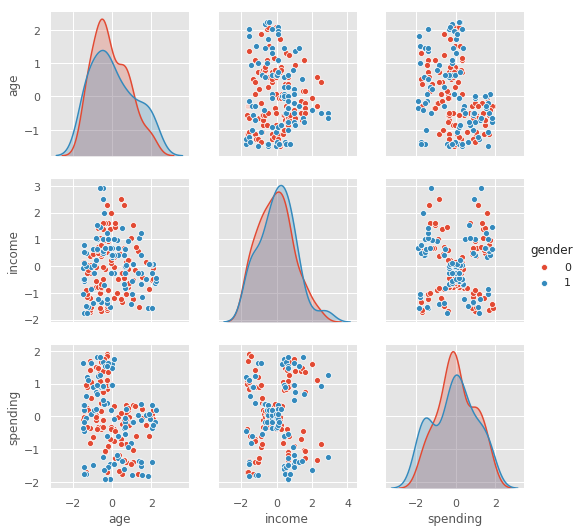

In [15]:
sns.pairplot(df5,hue="gender",vars=["age","income","spending"])

We finally take a look at gender and find it is quite uniformly distributed in all five clusters and thus continue ignoring it.

**Final Clusters according to K-means**  
**Cluster 0:** people of all ages with high income and low spending  
**Cluster 1:** older people with mid income and mid spending  
**Cluster 2:** younger people with low income and high spending  
**Cluster 3:** mostly older people with low income and low spending  
**Cluster 4:** younger people with high income and high spending  

These clusters can now be used to develop a better marketing strategy.  
For example, people in Cluster 2 (young + low income + high spend) can be given discounts through e-vouchers which will be accessible for them and reward their loyalty.  
People in Cluster 0 should be surveyed to find why they are not making purchases despite high income. This could highlight a problem in marketing strategy for these customers.



### Hierarchial Clustering
Make dendrogram.  
To identify number of clusters to keep, pick the longest vertical line. Draw a horizontal line towards its bottom. The number of vertical lines this horizontal line crosses are the number of clusters. In this case, the number of clusters are 7.

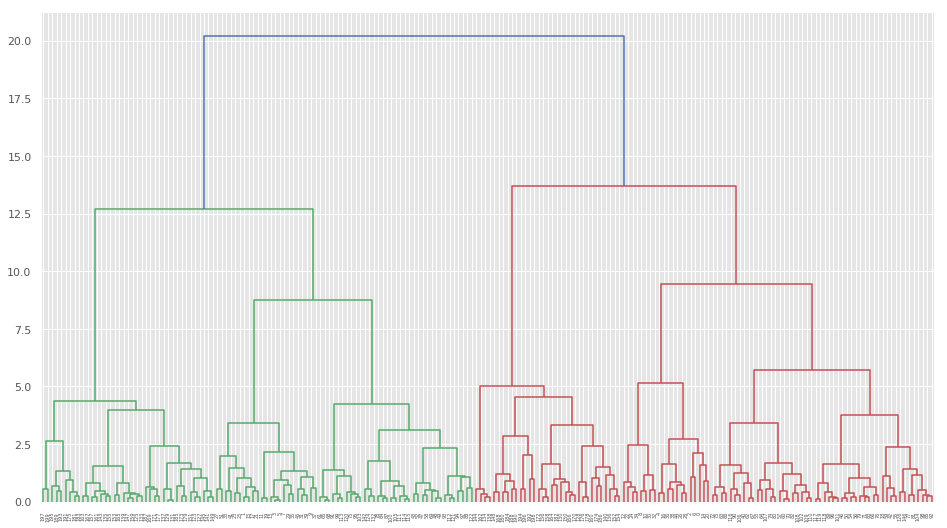

In [46]:
dendrogram = dendrogram(linkage(df[["gender","age","income","spending"]], method='ward'))

Plot two-way scatters for the 7 clusters

Silhouette Score = 0.300


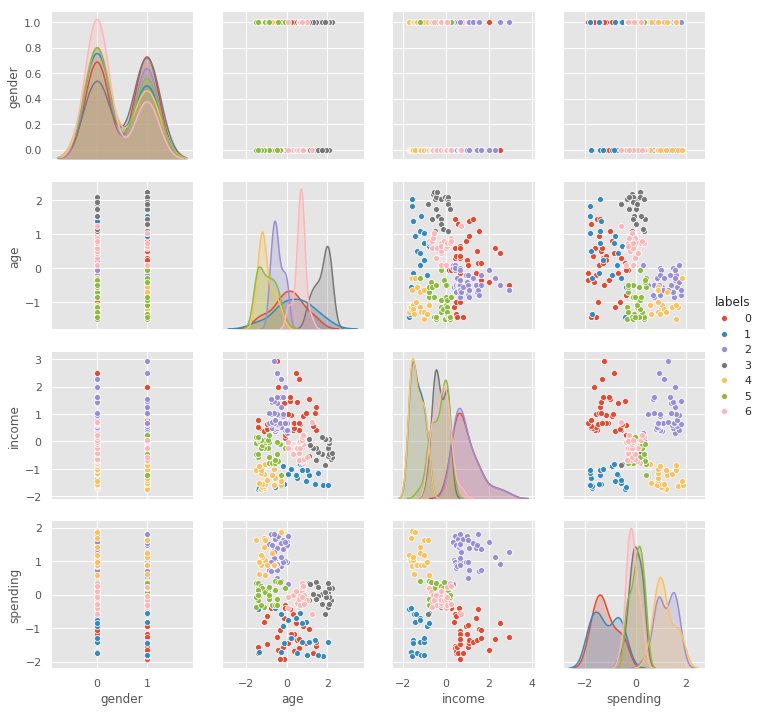

In [54]:
ward = AgglomerativeClustering(n_clusters=7,linkage='ward').fit(df)
df_ward = df
df_ward["labels"]=label
label = ward.labels_
# print(np.unique(df_ward["labels"]))

ss = silhouette_score(df_ward[["gender","age","income","spending"]], df_ward["labels"], metric="euclidean")
print(f"Silhouette Score = {ss:.3f}")

sns.pairplot(df_ward,hue="labels",vars=["gender","age","income","spending"])

Once again, not much differentiation between the clusters is found on gender.  
**Final Clusters according to Hierarchial Clustering**  
**Cluster 0:** all ages, high income, low spending  
**Cluster 1:** all ages, low income, low spending  
**Cluster 2:** young, high income, high spending  
**Cluster 3:** young, mid income, mid spending  
**Cluster 4:** mid age, mid income, mid spending  
**Cluster 5:** young, low income, high spending  
**Cluster 6:** old, mid income, mid spending  
  
Note: Silhouette Score achieved by 5-means was higher at 0.417 compared to that of 7 hierarchial clusters at 0.300.
